<h2>IS453 Financial Analytics</h2><h2>Lab 2 - Manipulating Time Series</h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from matplotlib.ticker import FuncFormatter

## 1. Compare price charts for different time frames

**Exercise Q1: Plot and review the Close price in the data set for AAPL from the last trading day of 1981 through 31 Dec 1984.**<br>

[*********************100%%**********************]  1 of 1 completed
                Open      High       Low     Close  Adj Close    Volume
Date                                                                   
1981-12-31  0.098772  0.099330  0.098772  0.098772   0.076059  54656000
1982-01-04  0.098772  0.098772  0.098214  0.098214   0.075630  71254400
1982-01-05  0.094308  0.094308  0.093192  0.093192   0.071763  35840000


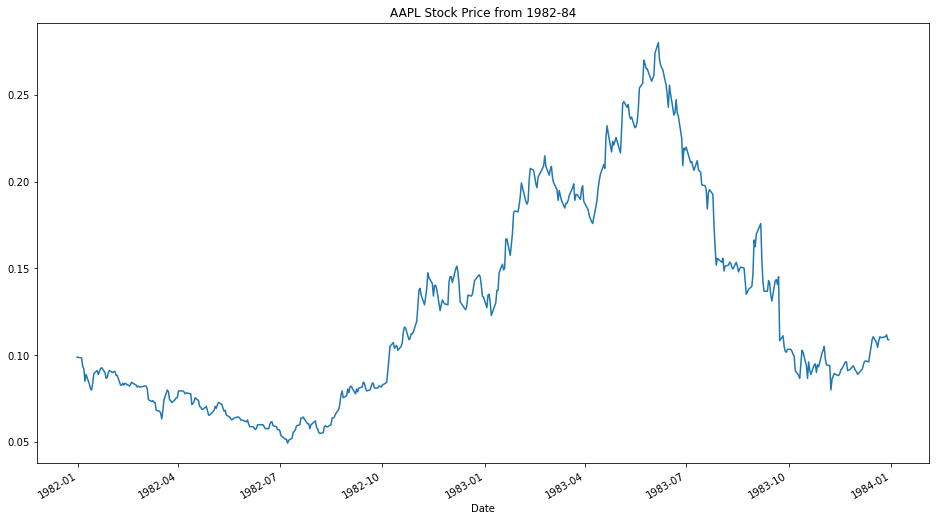

In [2]:
# sample code
tickers = ['AAPL']
start_date = '1981-12-31'
end_date = '1984-01-01'
stocks_df = yf.download(tickers, start= start_date, end= end_date)
stocks_df['Close'].plot(figsize=(16,9), title = 'AAPL Stock Price from 1982-84')

# make sure the last day of the previous year is the starting point
print(stocks_df.head(3))

1. What is the price range of the stock? <br>
2. Given that Apple's IPO price in 1980 was $22, What could explain why the stock price appears to be so small during the 1982-1983 period?<br>

*&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Hint: What adjustments are made to the Close price?*

In [3]:
high = max(stocks_df['Close']) 
low = min(stocks_df['Close'])
print("1. Price range is:", round(low,3), "to", round(high,3))
print("2. Apple could have performed a stock split in 1982")

1. Price range is: 0.049 to 0.28
2. Apple could have performed a stock split in 1982


### Compare 'Close' vs 'Adjusted close' prices

**Exercise Q2: Plot and compare 'SPY' 'Close' and 'Adj Close' prices on the same plot from the last trading day of 2010 through 31 Dec 2023?**<br>
- How do they differ over time?<br>
- What would account for the difference?<br></font>
    

In [4]:
# sample code
tickers2 = ['SPY']

start_date = '2010-12-31'
end_date = '2024-01-01'

spy_df = yf.download(tickers2, start= start_date, end= end_date)

# make sure the last day of the previous year is the starting point
print(spy_df.head(3))

[*********************100%%**********************]  1 of 1 completed
                  Open        High         Low       Close  Adj Close  \
Date                                                                    
2010-12-31  125.529999  125.870003  125.330002  125.750000  97.328049   
2011-01-03  126.709999  127.599998  125.699997  127.050003  98.334213   
2011-01-04  127.330002  127.370003  126.190002  126.980003  98.280045   

               Volume  
Date                   
2010-12-31   91218900  
2011-01-03  138725200  
2011-01-04  137409700  


Text(0, 0.5, 'Price')

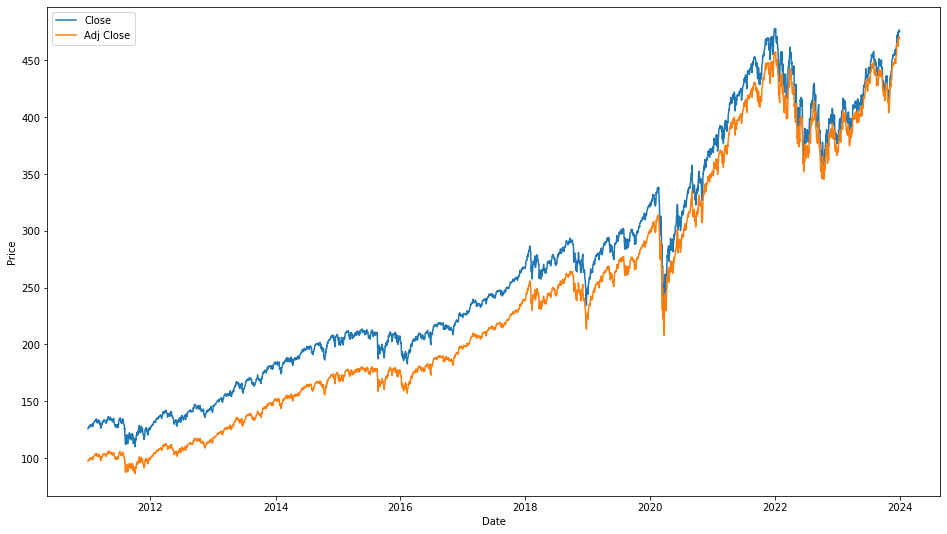

In [37]:
# your code here
plt.figure(figsize=(16, 9))
plt.plot(spy_df['Close'], label='Close')
plt.plot(spy_df['Adj Close'], label='Adj Close')
plt.legend()
plt.xlabel('Date')
plt.ylabel('Price')

- Your answer here

### Compare the price performance of multiple stocks

*Exercise Q3: Load data for AAPL, SPY, and XOM for 5 years from the last trading day of 2016 through 31 Dec 2021. Compare their <B>Adj Close</B> prices on a single chart*<br>
- What are some of the issues with using stock prices to compare these time series?<br>
</font>


[*********************100%%**********************]  3 of 3 completed
                 AAPL         SPY        XOM
Date                                        
2016-12-30  26.815556  195.791107  62.515720
2017-01-03  26.891962  197.288864  62.952076
2017-01-04  26.861862  198.462570  62.259449


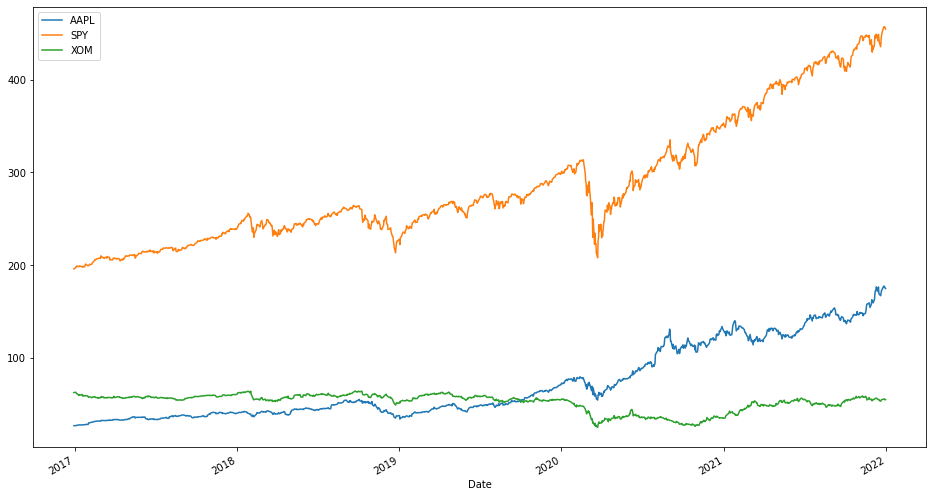

In [38]:
# sample code
tickers3 = ['AAPL','SPY','XOM']
start_date = '2016-12-30'
end_date = '2022-01-01'

stocks_df2 = yf.download(tickers3, start= start_date, end= end_date)

# get the adj close price
stocks_df2_adjclose = stocks_df2['Adj Close']

stocks_df2_adjclose.plot(figsize=(16,9))

# make sure the last day of the previous year is the starting point
print(stocks_df2_adjclose.head(3))

- Your answer here

## 2. Create cumulative return charts

### Example - pct_change function applied to AAPL prices

To address the above challenge, we can try to compare the stocks using their daily percentage returns. That is to say, we can normalize and compare scaled returns by creating a return series instead of comparing the raw price data.

- See how the pct_change() method works with AAPL as example. Plot the percentage change on adjusted close prices for AAPL over 5 years from the last trading day of 2016 through 31 Dec 2021 using pct_change(). 
- Set y-axis scale to be in percentage so as to make this and the following charts more easily readable.<br>

From the chart, we can see that plotting the pct_change is not particularly useful for analysis purposes. We need to accumulate and combine the daily returns to understand how the value of the instrument is changing over time.

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2016-12-30  29.162500  29.299999  28.857500  28.955000  26.815559  122345200
2017-01-03  28.950001  29.082500  28.690001  29.037500  26.891958  115127600
2017-01-04  28.962500  29.127501  28.937500  29.004999  26.861858   84472400


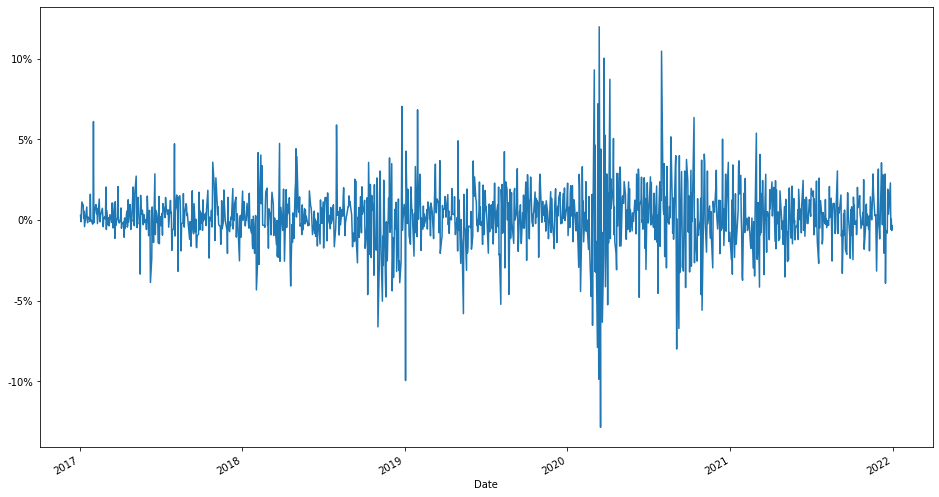

In [10]:
# sample code

tickers = ['AAPL']
start_date = '2016-12-30'
end_date = '2022-01-01'
stocks_df = yf.download(tickers, start= start_date, end= end_date)

# calculate percent change of prices for AAPL
pct_change = stocks_df['Adj Close'].pct_change()
ax1 = pct_change.plot(figsize=(16,9))

# this sets the axis to percentage scale
ax1.yaxis.set_major_formatter(FuncFormatter(lambda y, _: '{:.0%}'.format(y))) 

# make sure the last day of the previous year is the starting point
print(stocks_df.head(3))

## DYI

**DYI Q1: Create the cumulative return series for the stock**<br>
Refer to the formula in the "IS453 Module 2.5 - Lab 2.pptx" slides. <BR> 
Plot the cumulative return series of all the stocks in the stocks_df2_adjclose data frame from Exercise Q3.

*Hint: the cumulative return series values for 2016-12-30 should be NaN* <BR> 
*Hint: the final value in the cumulative return series for AAPL should be about 5.5*

In [11]:
# your code here
# Hint - you can apply the cumulative return formula on the entire dataframe, no need to work on the data columns individually

cum_return_series =  (stocks_df2_adjclose.pct_change()+1).cumprod() - 1
cum_return_series

,AAPL,SPY,XOM
Date,,,
2016-12-30,NaN,NaN,NaN
2017-01-03,0.002849,0.007650,0.006980
2017-01-04,0.001727,0.013645,-0.004099
2017-01-05,0.006821,0.012839,-0.018945
2017-01-06,0.018045,0.016463,-0.019499
...,...,...,...
2021-12-27,5.616445,1.332849,-0.109594
2021-12-28,5.578286,1.330943,-0.112471
2021-12-29,5.581589,1.333924,-0.120240


**DYI Q2: Find the difference of the total return for the stocks** <br> 
Determine the period return of the stocks using data frame iloc\[-1\] or tail(1) method.<br>
- What is the total five-year return in percent for each of the instruments, rounded to 1 decimal?

*Hint: Don't multiply by 100 to get percent, reformat using df.map('{:.1%}'.format)*

In [31]:
# your code here
five_year = cum_return_series.tail(1)
five_year.style.format('{:,.1%}'.format) 

,AAPL,SPY,XOM
Date,,,
2021-12-31 00:00:00,551.5%,132.2%,-12.0%


<ol> 
    <li> AAPL: 551.5% </li> 
    <li> SPY: 132.2% </li> 
    <li> XOM: -12.0% </li> 
</ol>

### Compare 'Close' vs 'Adjusted close' cumulative returns



**DYI Q3: Plot and compare 'SPY' 'Close' and 'Adj Close' cumulative return series on the same plot for 10 yrs from the last trading day of 2010 through 31 Dec 2020.**<br>
- What is the period return for the 10 years for Close and Adj Close <BR>
*Hint: the final value in cumulative return series is the period return* <BR>

- What percentage gain do the dividends add to the overall returns for that period?<BR>
*Hint: subtract the period return for Close from the period return from Adj Close determine the dividends' impact to the returns* <BR><BR>
    
*Hint: use '{:.1%}'.format(value) to display as percent.*

[*********************100%%**********************]  1 of 1 completed
10-year Adj Return: 262.80%
10-year Close Return: 197.32%
Dividends Percentage Gain: 65.48%


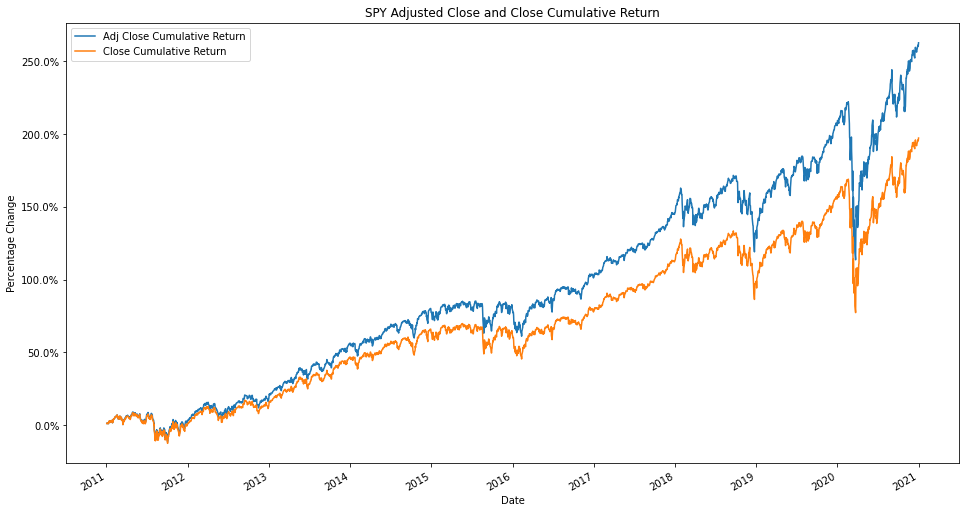

In [102]:
# PLOTTING
tickers = ['SPY']
start_date = '2010-12-31'
end_date = '2021-01-01'
spy_df = yf.download(tickers, start= start_date, end= end_date)
plt.figure(figsize=(16,9))

adj_pct_change = spy_df['Adj Close'].pct_change()
close_pct_change = spy_df['Close'].pct_change()

# PERIOD RETURN CALCULATION
adj_period_return =  (adj_pct_change+1).cumprod() - 1
close_period_return =  (close_pct_change+1).cumprod() - 1

adj_period_return.plot(label='Adj Close Cumulative Return')
close_period_return.plot(label='Close Cumulative Return')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.1%}'.format(x)))
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.title('SPY Adjusted Close and Close Cumulative Return')
plt.legend()

# FINAL CUMULATIVE RETURN
formatted_adj_return = '{:.2%}'.format(adj_period_return.tail(1).values[0])
formatted_close_return = '{:.2%}'.format(close_period_return.tail(1).values[0])
print("10-year Adj Return:",formatted_adj_return)
print("10-year Close Return:",formatted_close_return)

# PERCENTAGE GAIN FOR DIVIDENDS
percentage_gain = adj_period_return.tail(1).values[0] - close_period_return.tail(1).values[0]
formatted_percentage_gain = '{:.2%}'.format(percentage_gain)
print("Dividends Percentage Gain:", formatted_percentage_gain)

<b> Period return for SPY Close and Adj Close </b>
<ul> 
    <li> Adj Return: 78.98% </li>
    <li> Close Return: 65.99% </li>
    <li> Percentage Gain: 12.99% </li>
</ul>

**DYI Q4: Compare the *Adjusted Close* cumulative return series of SPY vs TLT from the last trading day of 2004 through 31 Dec 2013 in a single plot.**<br>
- Based on visual inspection, do the ETFs' price movements appear to be positively or negatively correlated?  If so, how?

[*********************100%%**********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

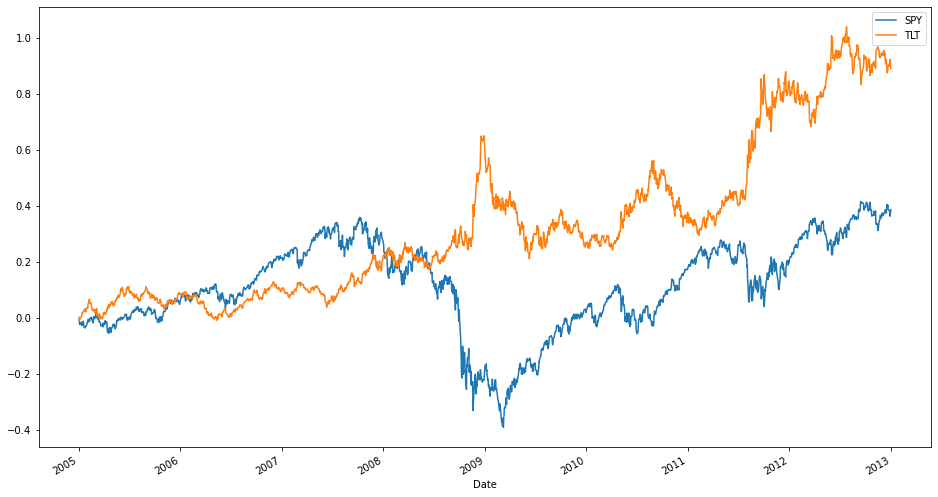

In [116]:
# your code here
tickers = ['SPY', 'TLT']
start_date = '2004-12-31'
end_date = '2013-01-01'
etf_df = yf.download(tickers, start= start_date, end= end_date)

adj_pct_change = etf_df['Adj Close'].pct_change()
cumulative_series =  (adj_pct_change+1).cumprod() - 1
cumulative_series.plot(figsize=(16,9))

<b> Answer: </b> Somewhat negative correlated. While the degrees may be different, the direction of the cumulative return is always inverse between SPY and TLT.

### Leveraged ETFs

**DYI Q5: Compare the *Adjusted Close* cumulative return series of SPY with UPRO from 1 Jun 2021 through 31 Dec 2021.**<br>
- Based on visual inspection do the ETFs appear to be positively or negatively correlated?  If so, how closely?

[*********************100%%**********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

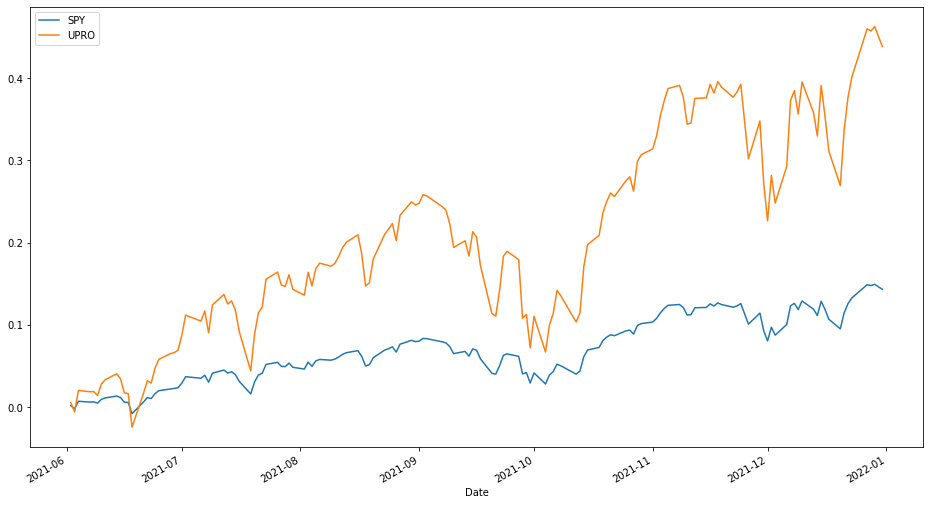

In [118]:
# your code here
tickers = ['SPY', 'UPRO']
start_date = '2021-06-01'
end_date = '2022-01-01'
etf_df = yf.download(tickers, start= start_date, end= end_date)

adj_pct_change = etf_df['Adj Close'].pct_change()
cumulative_series =  (adj_pct_change+1).cumprod() - 1
cumulative_series.plot(figsize=(16,9))

<b> Answer: </b> Quite positively correlated. UPRO's cumulative return varies more greatly than SPY's, but they both share the same direction.

**DYI Q6: Compare the cumulative return series of UPRO with SPY after dividing the UPRO returns by 3.**<br>
- How closely correlated do they look after the multiplicative adjustment?
- Why would this be the case?<BR><BR>
*Hint: Do not divide SPY returns by 3, just the UPRO returns.* <BR>*Hint: Look at the profile information of UPRO in Yahoo Finance.*

[*********************100%%**********************]  2 of 2 completed


<AxesSubplot:xlabel='Date'>

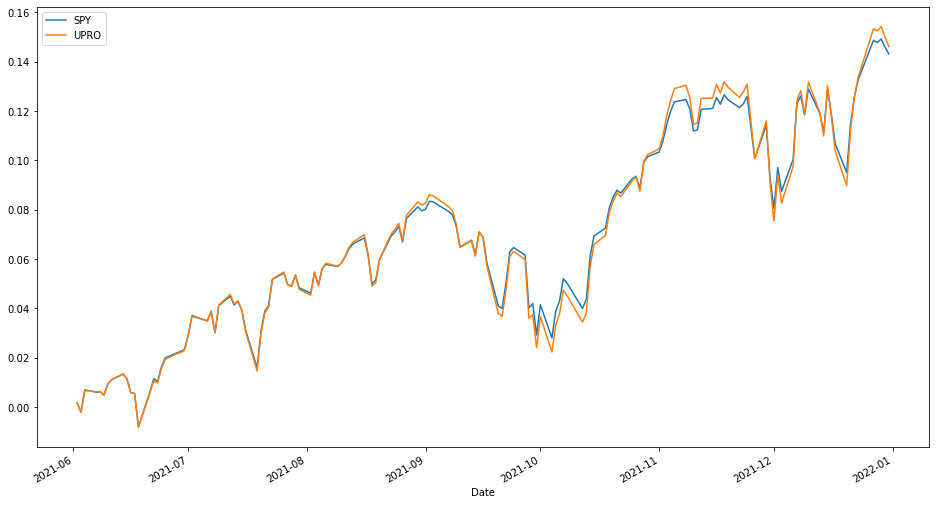

In [126]:
# your code here
tickers = ['SPY', 'UPRO']
start_date = '2021-06-01'
end_date = '2022-01-01'
etf_df = yf.download(tickers, start= start_date, end= end_date)

adj_pct_change = etf_df['Adj Close'].pct_change()
cumulative_series =  (adj_pct_change+1).cumprod() - 1
cumulative_series['UPRO'] = cumulative_series['UPRO'] / 3
cumulative_series.plot(figsize=(16,9))


<b> Answer: </b> After the multiplicative adjustment, both graphs seem almost identical. Based on what I understood from Yahoo Finance, UPRO is a 3x leveraged ETF based on SPY.